<a href="https://colab.research.google.com/github/tejalyadav/Data_Analytics_Experiments/blob/main/Expt6_SVM_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib as mpl

import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

In [4]:
%matplotlib inline

# We'll define a function to draw a nice plot of an SVM

def plot_svc(svc, X, y, h=0.02, pad=0.25):
  x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
  y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max ))
  Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
  plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
  # Support vectors indicated in plot by vertical lines
  sv = svc.support_vectors_
  plt.scatter(sv[:,0], sv[:,1], c='k', marker='x', s=100, linewidths='1') 
  plt.xlim(x_min, x_max)
  plt.ylim(y_min, y_max) 
  plt.xlabel('X1')
  plt.ylabel('X2') 
  plt.show()
  print('Number of support vectors: ', svc.support_.size)

In [5]:
from sklearn.svm import SVC

In [6]:
# Generating random data: 20 observations of 2 features and divide into tw

np.random.seed(5)

X = np.random.randn(20,2) 
y = np.repeat([1,-1], 10)

X[y == -1] = X[y == -1] +1

Text(0, 0.5, 'X2')

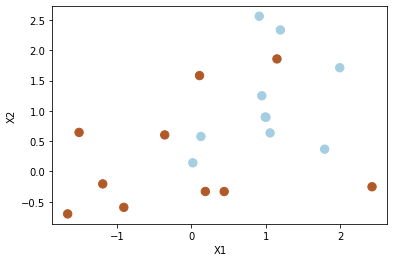

In [7]:
plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired) 
plt.xlabel('X1')

plt.ylabel('X2')

In [8]:
svc = SVC(C=1, kernel='linear')
svc.fit(X, y)

SVC(C=1, kernel='linear')

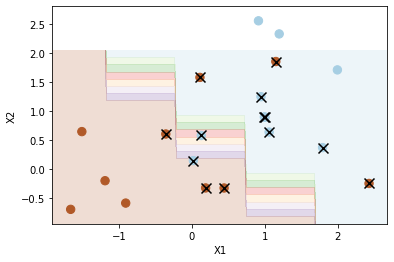

Number of support vectors:  13


In [9]:
plot_svc(svc, X, y)

In [10]:
svc.support_

array([10, 11, 13, 14, 15, 16, 17,  0,  1,  2,  4,  6,  8], dtype=int32)

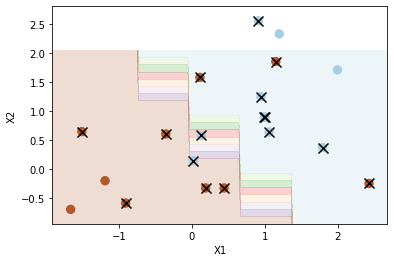

Number of support vectors:  16


In [11]:
svc2 = SVC(C=0.1, kernel='linear') 
svc2.fit(X, y)

plot_svc(svc2, X, y)

In [12]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


# Select the optimal C parameter by cross-validation

tuned_parameters = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}]

clf = GridSearchCV(SVC(kernel='linear'), tuned_parameters, cv=10 )
clf.fit(X, y)

GridSearchCV(cv=10, estimator=SVC(kernel='linear'),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}])

In [13]:
clf.grid_scores_

AttributeError: ignored

In [14]:
clf.best_params_

{'C': 0.001}

In [15]:
np.random.seed(1)

X_test = np.random.randn(20,2)
y_test = np.random.choice([-1,1], 20)

X_test[y_test == 1] = X_test[y_test == 1] -1

In [17]:
svc2 = SVC(C=0.001, kernel='linear')

In [19]:
svc2.fit(X, y)

y_pred = svc2.predict(X_test)

pd.DataFrame(confusion_matrix(y_test, y_pred), index=svc2.classes_)

,0,1
-1,2,6
1,0,12


Text(0, 0.5, 'X2')

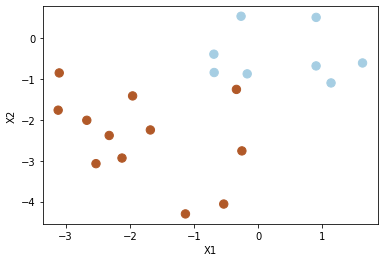

In [20]:
X_test[y_test == 1] = X_test[y_test == 1] -1

plt.scatter(X_test[:,0], X_test[:,1], s=70, c=y_test, cmap=mpl.cm.Paired) 
plt.xlabel('X1')

plt.ylabel('X2')

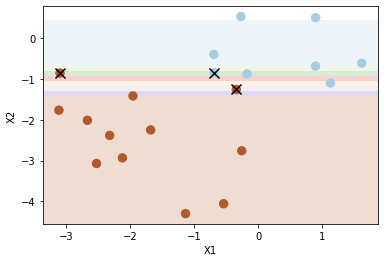

Number of support vectors:  3


In [21]:
svc3 = SVC(C=1e5, kernel='linear') 
svc3.fit(X_test, y_test) 
plot_svc(svc3, X_test, y_test)

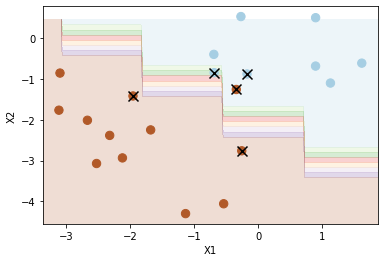

Number of support vectors:  5


In [22]:
svc4 = SVC(C=1, kernel='linear') 
svc4.fit(X_test, y_test) 
plot_svc(svc4, X_test, y_test)

In [24]:
from sklearn.model_selection import train_test_split 
np.random.seed(8)

X = np.random.randn(200,2)

X[:100] = X[:100] +2

X[101:150] = X[101:150] -2

y = np.concatenate([np.repeat(-1, 150), np.repeat(1,50)])

Text(0, 0.5, 'X2')

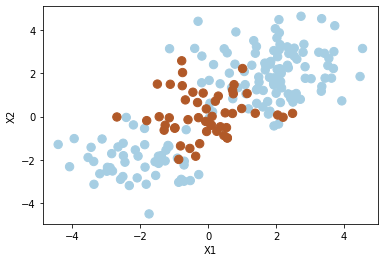

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired) 
plt.xlabel('X1')

plt.ylabel('X2')

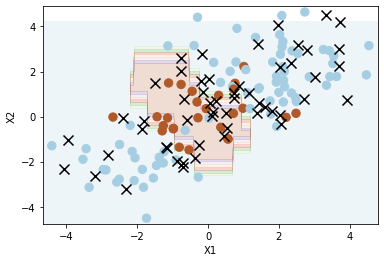

Number of support vectors:  54


In [27]:
svm = SVC(C=1.0, kernel='rbf', gamma=1) 
svm.fit(X_train, y_train)

plot_svc(svm, X_test, y_test)

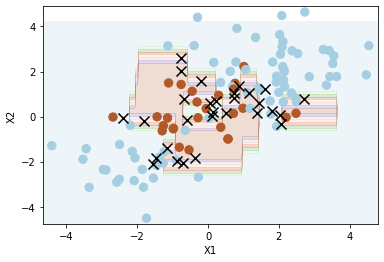

Number of support vectors:  29


In [28]:
# Increasing C parameter, allowing more flexibility 
svm2 = SVC(C=100, kernel='rbf', gamma=1.0) 
svm2.fit(X_train, y_train)

plot_svc(svm2, X_test, y_test)

In [29]:
tuned_parameters = [{'C': [0.01, 0.1, 1, 10, 100],

'gamma': [0.5, 1,2,3,4]}]

clf = GridSearchCV(SVC(kernel='rbf'), tuned_parameters, cv=10)
clf.fit(X_train, y_train)

clf.best_params_

{'C': 1, 'gamma': 0.5}

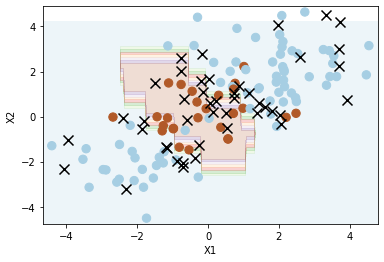

Number of support vectors:  44
[[72  2]
 [12 14]]
0.86


In [31]:
plot_svc(clf.best_estimator_, X_test, y_test) 
print(confusion_matrix(y_test, clf.best_estimator_.predict(X_test))) 
print(clf.best_estimator_.score(X_test, y_test))